In [52]:

import urllib.request
import json
import math
import matplotlib.pyplot as plt

In [53]:
#START-END POINT
P1=[-33.965526,18.377388]
P2=[-33.959881,18.478549]

#NUMBER OF POINTS
s=1000
interval_lat=(P2[0]-P1[0])/s #interval for latitude
interval_lon=(P2[1]-P1[1])/s #interval for longitude

#SET A NEW VARIABLE FOR START POINT
lat0=P1[0]
lon0=P1[1]

#LATITUDE AND LONGITUDE LIST
lat_list=[lat0]
lon_list=[lon0]

#GENERATING POINTS
for i in range(s):
    lat_step=lat0+interval_lat
    lon_step=lon0+interval_lon
    lon0=lon_step
    lat0=lat_step
    lat_list.append(lat_step)
    lon_list.append(lon_step)

In [54]:
#HAVERSINE FUNCTION
def haversine(lat1,lon1,lat2,lon2):
    lat1_rad=math.radians(lat1)
    lat2_rad=math.radians(lat2)
    lon1_rad=math.radians(lon1)
    lon2_rad=math.radians(lon2)
    delta_lat=lat2_rad-lat1_rad
    delta_lon=lon2_rad-lon1_rad
    a=math.sqrt((math.sin(delta_lat/2))**2+math.cos(lat1_rad)*math.cos(lat2_rad)*(math.sin(delta_lon/2))**2)
    d=2*6371000*math.asin(a)
    return d

In [55]:

#DISTANCE CALCULATION
d_list=[]
for j in range(len(lat_list)):
    lat_p=lat_list[j]
    lon_p=lon_list[j]
    dp=haversine(lat0,lon0,lat_p,lon_p)/1000 #km
    d_list.append(dp)
d_list_rev=d_list[::-1] #reverse list

In [56]:
#CONSTRUCT JSON
d_ar=[{}]*len(lat_list)
for i in range(len(lat_list)):
    d_ar[i]={"latitude":lat_list[i],"longitude":lon_list[i]}
location={"locations":d_ar}
json_data=json.dumps(location,skipkeys=int).encode('utf8')

#SEND REQUEST
url="https://api.open-elevation.com/api/v1/lookup"
response = urllib.request.Request(url,json_data,headers={'Content-Type': 'application/json'})
fp=urllib.request.urlopen(response)

In [57]:
#RESPONSE PROCESSING
res_byte=fp.read()
res_str=res_byte.decode("utf8")
js_str=json.loads(res_str)
#print (js_mystr)
fp.close()

#GETTING ELEVATION
response_len=len(js_str['results'])
elev_list=[]
for j in range(response_len):
    elev_list.append(js_str['results'][j]['elevation'])

#BASIC STAT INFORMATION
mean_elev=round((sum(elev_list)/len(elev_list)),3)
min_elev=min(elev_list)
max_elev=max(elev_list)
distance=d_list_rev[-1]
print(d_list_rev)

[0.0, 0.009350996672529815, 0.018701992727369176, 0.028052988164223025, 0.03740398298367431, 0.046754977185428, 0.05610597076918903, 0.06545696373554034, 0.0748079560841869, 0.08415894781478615, 0.09350993892801603, 0.10286092942353399, 0.11221191930104496, 0.12156290856113193, 0.13091389720349983, 0.1402648852278536, 0.1496158726347762, 0.15896685942397254, 0.16831784559514767, 0.17766883114888438, 0.1870198160848878, 0.19637080040286273, 0.20572178410339223, 0.21507276718618112, 0.224423749650887, 0.23377473149818773, 0.2431257127277407, 0.252476693339251, 0.2618276733333015, 0.2711786527095971, 0.28052963146784293, 0.28988060960862166, 0.2992315871313458, 0.30858256403659823, 0.3179335403240839, 0.3272845159935077, 0.3366354910454527, 0.34598646547962375, 0.35533743929572575, 0.36468841249429435, 0.3740393850751293, 0.38339035703788815, 0.3927413283831538, 0.40209229911063127, 0.41144326922002533, 0.42079423871191923, 0.4301452075860177, 0.4394961758420257, 0.4488471434805262, 0.458

In [58]:
print(elev_list)

[86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 349, 349, 349, 349, 349, 349, 349, 349, 349, 349, 349, 349, 349, 349, 349, 349, 349, 349, 349, 349, 349, 433, 433, 433, 433, 433, 433, 433, 433, 433, 433, 433, 433, 433, 433, 433, 433, 433, 433, 433, 433, 616, 616, 616, 616, 616, 411, 411, 411, 411, 411, 411, 411, 411, 411, 411, 411, 411, 411, 411, 411, 411, 465, 465, 465, 465, 465, 465, 465, 465, 465, 465, 465, 465, 465, 465, 465, 465, 465, 465, 465, 465, 52

In [59]:
print(len(d_list_rev))
print(len(elev_list))

1001
1001


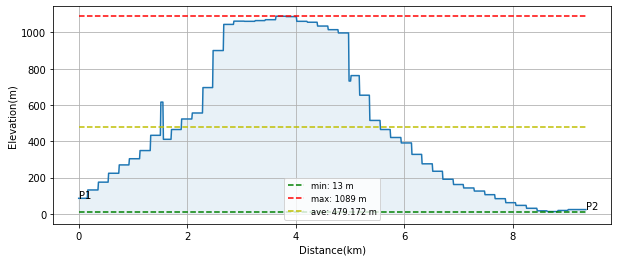

In [60]:
#PLOT ELEVATION PROFILE
base_reg=0
plt.figure(figsize=(10,4))
plt.plot(d_list_rev,elev_list)
plt.plot([0,distance],[min_elev,min_elev],'--g',label='min: '+str(min_elev)+' m')
plt.plot([0,distance],[max_elev,max_elev],'--r',label='max: '+str(max_elev)+' m')
plt.plot([0,distance],[mean_elev,mean_elev],'--y',label='ave: '+str(mean_elev)+' m')
plt.fill_between(d_list_rev,elev_list,base_reg,alpha=0.1)
plt.text(d_list_rev[0],elev_list[0],"P1")
plt.text(d_list_rev[-1],elev_list[-1],"P2")
plt.xlabel("Distance(km)")
plt.ylabel("Elevation(m)")
plt.grid()
plt.legend(fontsize='small')
plt.show()